## problem statement
Your task is to write a small Python or PySpark script that **predicts the total number of retweets a tweet**  will get using only the provided dataset. This task is designed to test your Python or PySpark ability, your knowledge of Data Science techniques and your ability to work effectively, efficiently and independently within a commercial setting. This task is not designed to test your hypertuning abilities or lateral thinking. Think of this as iteration one or a proof of concept. Be critical of the data it is raw straight from the Twitter API.

Deliverables:

One Python or PySpark script – a Jupyter notebook is preferable

One virtual environment requirements text file including an exhaustive list of packages and version numbers used in your solution (pip freeze > requirements.txt)

Nothing else

 Your solution should at a minimum do the following:

Load the data into memory

Prepare the data for modelling

Build a model on training data

Test the model on testing data

Provide some measure of performance

 Please include a list of references (commented in the Python or PySpark script) if you include code from external sources. We suggest spending no more than four hours on this task.

In [2]:
## loading data using pandas
import pandas as pd
import numpy as np
from pandas import ExcelFile
xls = ExcelFile('tweets.xlsx')
df = xls.parse(xls.sheet_names[0])
len(df)


42368

In [3]:
from dateutil import parser
def time_format(date_string):
    dt = parser.parse(date_string)
    return(dt.strftime("%Y-%m-%d %H:%M:%S"))

In [3]:
df.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [ ]:
df.tail()

In [ ]:
df.info()

In [4]:
df['TweetPostedTime'] = df['TweetPostedTime'].apply(lambda x:time_format(x))
df['TweetPostedTime'] = pd.to_datetime(df['TweetPostedTime'],format = "%Y-%m-%d %H:%M:%S")

In [ ]:
print (min(df['TweetPostedTime']))
print(max(df['TweetPostedTime']))

The data is of one day, I am not sure how to capture temporal variation of the tweets. Data exploration will suggest the temporal variation in 'tweet retweet count'. We should generally ignore retweets which are not retweets of the tweets available in dataset as we donot know the features of the the original tweet that are only retweets in the data.

In [5]:
import re
def rem_RT(text):
    """removing RT@*: from tweet body to check the temporal 
    variation of retweet counts """
    text = str(text)
    rem_rt_text = re.sub('RT.*?:','',text, flags=re.DOTALL)
    return rem_rt_text
    

In [6]:
## using retweets to figure out if there are temporal variation overtime 
## will compare tweets and its retweets
## since other retweets which are not the tweets available in dataset will not make sense in creating model
## as we are not aware of the source tweet followers, friends counts etc
df_rt = df[df['TweetRetweetFlag']==True]
df_no_rt = df[df['TweetRetweetFlag']==False]

In [7]:
df_t = df.copy()
df_t['TweetBody'] = df_t['TweetBody'].apply(lambda x :rem_RT(x) )

In [8]:
#test_rem_RT = df_rt.copy()
df_rt['TweetBody'] = df_rt['TweetBody'].apply(lambda x :rem_RT(x) )

/home/paperspace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df_rt_tweet = df_rt[['TweetPostedTime', 'TweetID', 'TweetBody','TweetRetweetCount']]
rem_dup_df=df_rt_tweet.drop_duplicates(df_rt_tweet.columns)
len(rem_dup_df)

26862

In [10]:
df_no_rt_tweet = df_no_rt[['TweetPostedTime', 'TweetID', 'TweetBody','TweetRetweetCount']]

In [11]:
merged_df = pd.merge(df_no_rt_tweet, rem_dup_df, how='inner', on=['TweetBody'])

In [12]:
merged_df['flag'] = np.sign(merged_df.TweetRetweetCount_y - merged_df.TweetRetweetCount_x)

In [13]:
sum(merged_df['flag'])

0

In [14]:
#it is clear that there are no change in the tweets even if there are retweets of the same tweet so 
#We are interested in only tweets and not retweets
# so removing all retweets
df_rem_rt = df[df['TweetRetweetFlag']==False]
len(df_rem_rt)

15506

In [15]:
## Checking duplicates if any
rem_dup_df=df_rem_rt.drop_duplicates(df_rem_rt.columns)
len(rem_dup_df)

15506

In [ ]:
rem_dup_df.head()


# Steps 

## Data preprocessing

## Data cleaning
- text cleaning and retain features to train the model
- Look for any anomalies and address them if required

## Model training

## Model testing
- test the best performing model on test set
- Look for bias or overfitting 

## Feature expansion and engineering
-



In [16]:
rem_dup_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15506 entries, 2 to 42364
Data columns (total 32 columns):
TweetPostedTime              15506 non-null datetime64[ns]
TweetID                      15506 non-null int64
TweetBody                    15506 non-null object
TweetRetweetFlag             15506 non-null bool
TweetSource                  15506 non-null object
TweetInReplyToStatusID       101 non-null float64
TweetInReplyToUserID         189 non-null float64
TweetInReplyToScreenName     189 non-null object
TweetRetweetCount            15506 non-null int64
TweetFavoritesCount          15506 non-null int64
TweetHashtags                15406 non-null object
TweetPlaceID                 997 non-null object
TweetPlaceName               997 non-null object
TweetPlaceFullName           997 non-null object
TweetCountry                 996 non-null object
TweetPlaceBoundingBox        997 non-null object
TweetPlaceAttributes         0 non-null float64
TweetPlaceContainedWithin    0 non-nul

In [17]:
## choosing the columns which can be features
## based on reasearch work published making taking features which can be important
## parsimonious model is subject to less overfitting
model_df = rem_dup_df[['TweetID','TweetPostedTime','TweetRetweetCount','UserTweetCount','UserListedCount',
                       'UserFriendsCount','UserFollowersCount','TweetBody']].reset_index(drop=True)

In [16]:
model_df = rem_dup_df[['TweetRetweetCount','UserTweetCount','UserListedCount',
                       'UserFriendsCount','UserFollowersCount','TweetBody']].reset_index(drop=True)

In [17]:
model_df['TweetRetweetCount'].describe()

count    15506.000000
mean         2.116084
std         71.928530
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3309.000000
Name: TweetRetweetCount, dtype: float64

In [ ]:
import matplotlib
matplotlib.use('Agg')

In [1]:
#%matplotlib
import matplotlib.pyplot as plt
#plt.use('Agg')

In [ ]:
plt.hist(tweets.groupby("UserID")["TweetID"].nunique(), bins=100)
plt.title("Number of tweets per user in the 10 hour window of tweets recorded")
plt.show()

In [24]:
TweetRetweetCount = model_df['TweetRetweetCount']
plt.hist(TweetRetweetCount, bins=2)
plt.title("Number of TweetRetweetCount of a tweet")
plt.show()

TclError: no display name and no $DISPLAY environment variable

In [ ]:
hist = TweetRetweetCount.hist(bins=3)

 Most of the values are 0 and only few of the tweets are popular which is very practial as not all tweets can be popular.
 A normal linear regression based model can be tried but since there is a huge variation in the output labels(TweetRetweetCount) it may not be useful. We should look at other types of regressin model for this an probably quatile regression should be good choice. Also the metric like root mean square error (RMSE) is popular for these kind of task but it will not be justified to use here since it appears that most of the output is 0 or closer to zero and only a few of them are large continous variables. we can try modeified RMSE on values that are more than 0.95 percentile and values that are less that 0.95 percentile


In [19]:
## Create a test and train files
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(model_df, test_size=0.2) 
                                     

In [20]:
df_train=df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
df_test.shape

(3102, 6)

In [22]:
#creating content feature from tweet body as they can significantly influence the retweet counts
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
transform_tweet = CountVectorizer(min_df =0.03,stop_words='english')## save this vectorizer for test set
x_train_tweeet = transform_tweet.fit_transform(df_train['TweetBody'])
tfidf_trfm = TfidfTransformer()
X_tr_tfidf = tfidf_trfm.fit_transform(x_train_tweeet)


In [23]:
X_tr_tfidf.shape

(12404, 19)

In [24]:
x_test = transform_tweet.transform(df_test['TweetBody'])
X_te_tfidf = tfidf_trfm.transform(x_test)

In [25]:
X_te_tfidf.shape

(3102, 19)

In [26]:
count_vect_df = pd.DataFrame(X_tr_tfidf.todense(), columns=transform_tweet.get_feature_names())
count_vect_df_test = pd.DataFrame(X_te_tfidf.todense(), columns=transform_tweet.get_feature_names())

In [27]:
df_train= pd.concat([df_train.drop(['TweetBody'], axis=1), count_vect_df], axis=1)
df_test= pd.concat([df_test.drop(['TweetBody'], axis=1), count_vect_df_test], axis=1)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12404 entries, 0 to 12403
Data columns (total 24 columns):
TweetRetweetCount     12404 non-null int64
UserTweetCount        12404 non-null int64
UserListedCount       12404 non-null int64
UserFriendsCount      12404 non-null int64
UserFollowersCount    12404 non-null int64
amp                   12404 non-null float64
best                  12404 non-null float64
christmas             12404 non-null float64
daily                 12404 non-null float64
holiday               12404 non-null float64
https                 12404 non-null float64
japan                 12404 non-null float64
japantravel           12404 non-null float64
latest                12404 non-null float64
new                   12404 non-null float64
photography           12404 non-null float64
rt                    12404 non-null float64
thanks                12404 non-null float64
tourism               12404 non-null float64
travel                12404 non-null float64
t

In [28]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(1)

Y_train = df_train['TweetRetweetCount']
X_test = df_test.drop('TweetRetweetCount',axis=1)
Y_test = df_test['TweetRetweetCount']
X_train= df_train.drop('TweetRetweetCount',axis=1)

alpha = 0.95

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=100, max_depth=10,
                                learning_rate=.01, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X_train, Y_train)



GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [29]:
feature_importance = clf.feature_importances_ 

In [30]:
feature = X_train.columns

In [31]:
def sort_list(list1, list2):
 
    zipped_pairs = zip(list2, list1)
 
    z = [x for _, x in sorted(zipped_pairs)]
     
    return z

In [35]:
sort_list(feature,sorted_idx)

['traveller',
 'ttot',
 'vacation',
 'world',
 'https',
 'latest',
 'rt',
 'UserFollowersCount',
 'photography',
 'travel',
 'best',
 'UserListedCount',
 'amp',
 'new',
 'thanks',
 'UserFriendsCount',
 'christmas',
 'daily',
 'tourism',
 'UserTweetCount',
 'japan',
 'holiday',
 'japantravel']

In [1]:
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

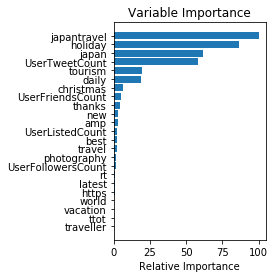

In [36]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, sort_list(feature,sorted_idx))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [53]:
# Make the prediction
y_pred = clf.predict(X_test) # prediction with trained model
y_0 = np.zeros(len(Y_test.values), dtype = int) # prediction by assuming all predicitons to zero as most of the data is zero
y_mean = np.full(len(Y_test.values), np.mean(Y_test.values)) # prediction with mean value of the data just to create baselines

In [58]:
y_pred = clf.predict(X_train) # prediction with trained model
y_0 = np.zeros(len(Y_train.values), dtype = int) # prediction by assuming all predicitons to zero as most of the data is zero
y_mean = np.full(len(Y_train.values), np.mean(Y_train.values)) # prediction with mean value of the data just to create baselines

In [60]:
# Creatign pandas dataframe
test_array = np.vstack((Y_train.values,y_pred,y_0,y_mean)).T
# columns
columns_new = ['ground', 'prediction','prediction_0', 'prediction_mean']

# pass in array and columns
pred_df = pd.DataFrame(test_array, columns=columns_new)

In [64]:
pred_df_95 = pred_df[pred_df.ground < np.percentile(pred_df.ground,95)]
pred_df_100 = pred_df[pred_df.ground > np.percentile(pred_df.ground,95)]

In [65]:
pred_df_100

,ground,prediction,prediction_0,prediction_mean
6,10.0,14.733293,0.0,2.538536
39,4.0,3.988005,0.0,2.538536
90,4.0,8.171005,0.0,2.538536
108,11.0,19.037900,0.0,2.538536
113,5.0,5.076090,0.0,2.538536
174,3.0,3.006268,0.0,2.538536
208,4.0,24.838293,0.0,2.538536
253,4.0,3.764142,0.0,2.538536
310,4.0,3.989744,0.0,2.538536
333,3.0,2.221758,0.0,2.538536


 Metrics to test the RMSE for 0.95 percentile data

In [73]:
from sklearn.metrics import mean_squared_error
import math
error_pred = math.sqrt(mean_squared_error(pred_df_95.ground,pred_df_95.prediction))
error_pred_0 = math.sqrt(mean_squared_error(pred_df_95.ground,pred_df_95.prediction_0))
error_pred_mean = math.sqrt(mean_squared_error(pred_df_95.ground,pred_df_95.prediction_mean))
print("quantile pred error :%f " %error_pred)
print("baseline with zero error : %f" %error_pred_0)
print("baseline with mean errror : %f"%error_pred_mean)

quantile pred error :15.898976 
baseline with zero error : 0.288405
baseline with mean errror : 2.470839


In [74]:
#testScore=math.sqrt(mean_squared_error(pred_df_100.ground,pred_df_100.prediction))
error_pred = math.sqrt(mean_squared_error(pred_df_100.ground,pred_df_100.prediction))
error_pred_0 = math.sqrt(mean_squared_error(pred_df_100.ground,pred_df_100.prediction_0))
error_pred_mean = math.sqrt(mean_squared_error(pred_df_100.ground,pred_df_100.prediction_mean))
print("quantile pred error :%f " %error_pred)
print("baseline with zero error : %f" %error_pred_0)
print("baseline with mean errror : %f"%error_pred_mean)

quantile pred error :164.602101 
baseline with zero error : 463.803815
baseline with mean errror : 463.370876


## Results and conclustion

- the quantile model doesnot look bad if one looks at the RMSE scores of different predictions at 0.95 percentile cutoff
- More exploration may be done on various features other than content features, or by creating more features from the features available like create a feature from tweeter post time and twitter signup time to understand the duration of the user on twitter
-  More visualizaiton with graphs will help in better understanding, I have not done graph visulaization just to save my time as tables are giving enough information
- Models other that quantile regression like spline regression can also be modelled toheck the accuracy. infact hyperparameter tuning can also give good results in quantile regerssion
- codestyle can be improved for understanding

# References
https://twittercommunity.com/t/twitter-api-listed-count/32759
http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html
http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py